In [19]:
!git clone https://github.com/inoueMashuu/hiragana-dataset.git

fatal: destination path 'hiragana-dataset' already exists and is not an empty directory.


In [20]:
import numpy as np
import pandas as pd
import os
print(os.getcwd())

d:\CODES\Personal Github\MLProjs


In [21]:
with open('hiragana-dataset/import_hiragana_dataset.m', 'r') as file:
    contents = file.read()
print(contents)

%************************************************************************
% import_hiragana_dataset.m
%************************************************************************
% 
% This is a simple script that imports the hiragana-dataset to MATLAB,
% with proper labeling. It is important to note that it is required to put 
% the script in the same folder as the pictures.
% 
% With this script, MATLAB imports the dataset and have a label to act as a
% guide to use in Neural Networks tools, such as nprtool.
% 
% It is a small dataset with handwritten pictures of hiragana, with 20 samples
% for each kana. It covers every hiragana, plus a few examples of characters with
% dakuten and handakuten, totalizing 1000 images.
%
%     *****************************************************************
%
%     Written by: Matheus Inoue, Federal University of ABC,  2016
%
%     *****************************************************************

clear all
close all

k=1;
for i=1:20
    nome = ['kanaA',

In [22]:
import csv

# Define the kana characters and their corresponding labels
kana_characters = [
    'A', 'I', 'U', 'E', 'O', 'MA', 'MI', 'MU', 'ME', 'MO',
    'KA', 'KI', 'KU', 'KE', 'KO', 'SA', 'SHI', 'SU', 'SE', 'SO',
    'YA', 'YU', 'YO', 'WA', 'WO', 'TA', 'CHI', 'TSU', 'TE', 'TO',
    'NA', 'NI', 'NU', 'NE', 'NO', 'HA', 'HI', 'FU', 'HE', 'HO',
    'RA', 'RI', 'RU', 'RE', 'RO', 'N', 'DA', 'JI', 'BA', 'PI'
]

# Initialize variables
image_data = []
k = 0

# Loop through each kana character and generate image names and labels
for kana in kana_characters:
    for i in range(20):
        image_name = f'hiragana-dataset/hiragana_images/kana{kana}{i}.jpg'
        label = kana
        image_data.append([image_name, label])
    k += 1

# Write the data to a CSV file
csv_file = 'hiragana_dataset2.csv'
with open(csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['ImageName', 'Label'])  # Write header
    csvwriter.writerows(image_data)

print(f'Data successfully written to {csv_file}')

df = pd.read_csv(csv_file)
df.head(100)


Data successfully written to hiragana_dataset2.csv


,ImageName,Label
0,hiragana-dataset/hiragana_images/kanaA0.jpg,A
1,hiragana-dataset/hiragana_images/kanaA1.jpg,A
2,hiragana-dataset/hiragana_images/kanaA2.jpg,A
3,hiragana-dataset/hiragana_images/kanaA3.jpg,A
4,hiragana-dataset/hiragana_images/kanaA4.jpg,A
...,...,...
95,hiragana-dataset/hiragana_images/kanaO15.jpg,O
96,hiragana-dataset/hiragana_images/kanaO16.jpg,O
97,hiragana-dataset/hiragana_images/kanaO17.jpg,O
98,hiragana-dataset/hiragana_images/kanaO18.jpg,O


In [23]:
from PIL import Image
img_width, img_height = 64, 64

# Load images and labels
images = []
labels = []

for index, row in df.iterrows():
    img = Image.open(row['ImageName']).convert('L')  # convert image to grayscale
    img = img.resize((img_width, img_height))
    img_array = np.array(img)
    images.append(img_array)
    labels.append(row['Label'])

images = np.array(images)
images = images.reshape(images.shape[0], img_width, img_height, 1)  # reshape for CNN input
labels = np.array(labels)


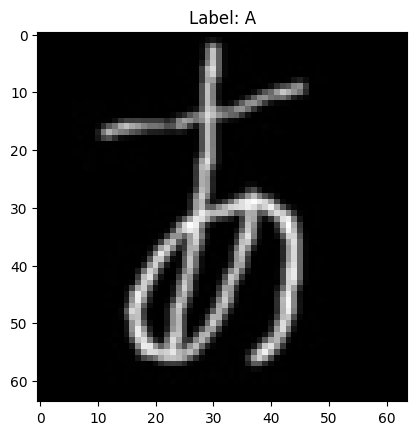

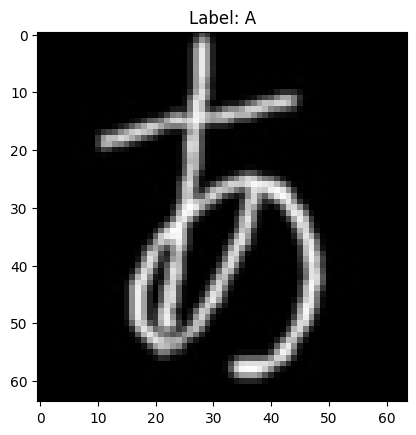

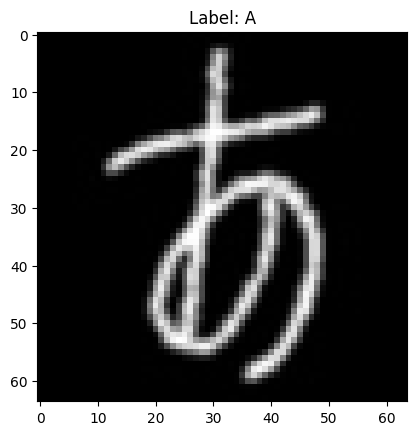

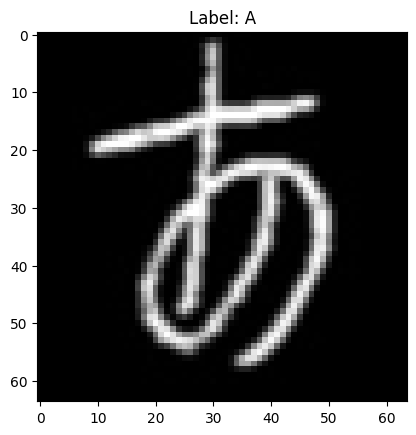

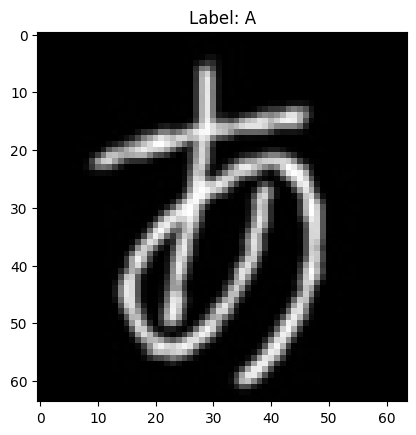

In [24]:
import matplotlib.pyplot as plt

# Display the first 5 images and their labels
for i in range(5):
    plt.imshow(images[i].reshape(img_width, img_height), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.show()